In [18]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dfMaterial = pd.read_csv('datos-material.csv',  sep = ";")
dfGrosor = pd.read_csv('datos-grosor.csv',  sep = ";")

print(dfGrosor)

   Angulo  Grosor  Conteo        R      T  Conteo Filtro  R Filtro  T Filtro
0       0    0.00  798.87  798.573  1.000        837.150   836.853  1.000000
1      10    0.05  334.47  334.173  0.419        350.895   350.598  0.418948
2      20    0.10  158.59  158.293  0.199        160.855   160.558  0.191859
3      30    0.15   79.90   79.603  0.100         75.845    75.548  0.090276
4      40    0.20   42.82   42.523  0.054         39.185    38.888  0.046469
5      50    0.25   25.11   24.813  0.031         22.560    22.263  0.026603
6      60    0.30   11.44   11.143  0.014          8.865     8.568  0.010238


  Elemento   Z  Tiempo   Conteo         R        T      Mu  Conteo Filtro  \
0      NaN   0      30  1590.27  79498.65  1.00000    0.00         674.37   
1        C   6      30  1526.60  76315.15  0.95996    0.82         645.23   
2       Al  13      30   949.77  47473.65  0.59716   10.31         353.73   
3       Fe  26     300   114.15    113.86  0.00143  130.97          36.99   
4       Cu  29     300     7.65      7.36  0.00009  185.76           2.94   
5       Zr  40     300   158.65    158.35  0.00199  124.37          96.66   
6       Ag  47     300    35.04     34.74  0.00044  154.71           8.35   

   R Filtro  T Filtro  Mu Filtro  
0  33703.65   1.00000       0.00  
1  32246.65   0.95677       0.88  
2  17671.65   0.52432      12.91  
3     36.70   0.00109     136.45  
4      2.65   0.00008     189.05  
5     96.36   0.00286     117.15  
6      8.05   0.00024     166.79  


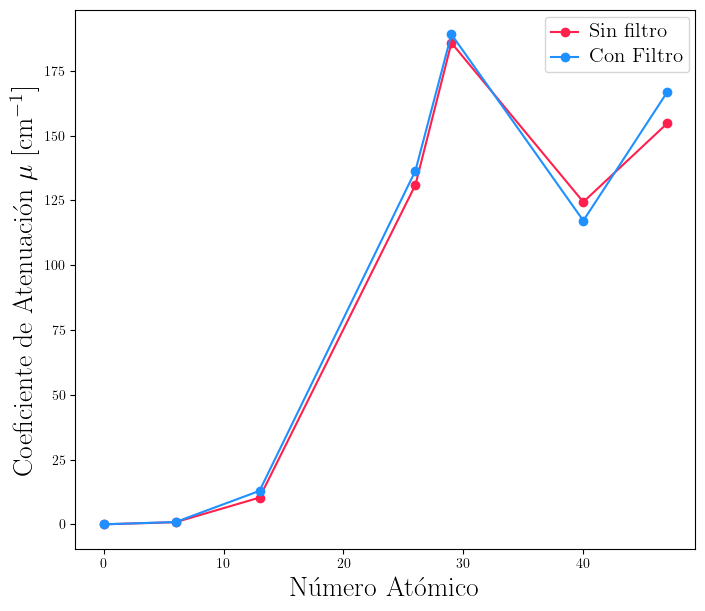

In [38]:
# Transmision for diferent materials
mAtomicNumber = dfMaterial['Z']
mMu = dfMaterial['Mu']
mMuFilter = dfMaterial['Mu Filtro']

print(dfMaterial)

fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(8)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.plot(mAtomicNumber, mMu, 'o-', label='Sin filtro', color='#FF204E')
plt.plot(mAtomicNumber, mMuFilter, 'o-', label='Con Filtro', color='#1E90FF')
plt.xlabel('Número Atómico', fontdict={'color': 'black', 'size': 20})
plt.ylabel('Coeficiente de Atenuación $\\mu$ [cm$^{-1}$]', fontdict={'color': 'black', 'size': 20})
legend = plt.legend()
for text in legend.texts:
    text.set_fontsize(15)
plt.show()


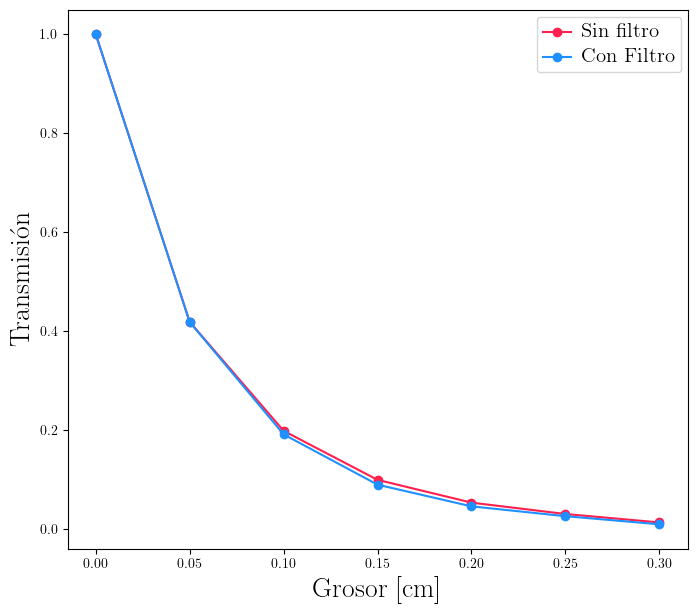

Sin filtro
Pendiente:  -13.798701469382026
Intercepto:  -0.13707437424889957
Con filtro
Pendiente:  -14.768742988220973
Intercepto:  -0.09942865002691725


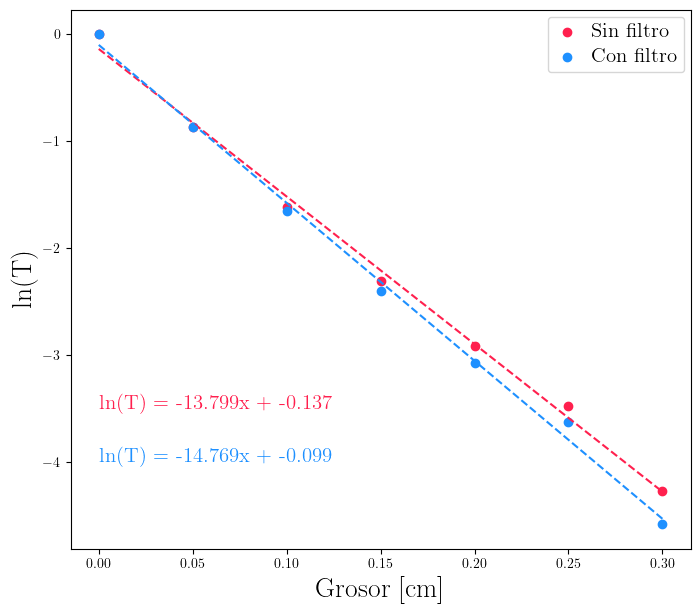

In [36]:
# Transmision for diferent thickness
gThickness = dfGrosor['Grosor']
gT = dfGrosor['T']
gTFilter = dfGrosor['T Filtro']

fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(8)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.plot(gThickness, gT, 'o-', label='Sin filtro', color='#FF204E')
plt.plot(gThickness, gTFilter, 'o-', label='Con Filtro', color='#1E90FF')
plt.xlabel('Grosor [cm]', fontdict={'color': 'black', 'size': 20})
plt.ylabel('Transmisión', fontdict={'color': 'black', 'size': 20})
legend = plt.legend()
for text in legend.texts:
    text.set_fontsize(15)
plt.show()

# Linear regression
gTln = np.log(gT)
gTlnFilter = np.log(gTFilter)

slope, intercept, r_value, p_value, std_err = linregress(gThickness, gTln)
slopeFilter, interceptFilter, r_valueFilter, p_valueFilter, std_errFilter = linregress(gThickness, gTlnFilter)

print("Sin filtro")
print("Pendiente: ", slope)
print("Intercepto: ", intercept)

print("Con filtro")
print("Pendiente: ", slopeFilter)
print("Intercepto: ", interceptFilter)

fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(8)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.plot(gThickness, gTln, 'o', label='Sin filtro', color='#FF204E')
plt.plot(gThickness, gTlnFilter, 'o', label='Con filtro', color='#1E90FF')
plt.plot(gThickness, slope*gThickness + intercept, '--', color='#FF204E')
plt.plot(gThickness, slopeFilter*gThickness + interceptFilter, '--', color='#1E90FF')
plt.xlabel('Grosor [cm]', fontdict={'color': 'black', 'size': 20})
plt.ylabel('ln(T)', fontdict={'color': 'black', 'size': 20})

plt.text(0, -3.5, 'ln(T) = ' + str(round(slope, 3)) + 'x + ' + str(round(intercept, 3)), fontsize=15, color='#FF204E')
plt.text(0, -4, 'ln(T) = ' + str(round(slopeFilter, 3)) + 'x + ' + str(round(interceptFilter, 3)), fontsize=15, color='#1E90FF')

legend = plt.legend()
for text in legend.texts:
    text.set_fontsize(15)
plt.show()

